In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Helper functions

def ans_to_num(ans):
    return {"Helemaal mee oneens":-2,
          "Beetje mee oneens":-1,
          "Neutraal":0,
          "Beetje mee eens":1,
          "Helemaal mee eens":2}[ans]

def invert(x):
    return x*-1

def see_q(num):
    return new_to_old["q{}".format(num)]

In [3]:
# Loading in the data
switched_vs_not_switched = pd.read_csv("switched_vs_not_switched.csv")
filtered = pd.read_csv("students_filtered.csv")

# Defining the IDs of the students that have switched
switched_ids = ['811309b5-cd88-4e90-bf5e-58dcf8cd1c3b',
 '143c74f5-4f1e-43fe-a81c-97032d451d0a',
 'd4dece96-9ca4-4541-9ff0-aa532246c023',
 '4f032d69-535e-41b1-a0d9-79709c630e76',
 '5aae20ad-9085-46f4-a7be-2307a70eecd3',
 'a7838679-a19f-42db-a7f1-4ca09a8d4f9f',
 '83e848b4-dc4c-4546-b808-93509060a556',
 '1bb90261-2804-48d9-9f4e-d51c7ae6c4a8',
 '8cda6395-b8b2-49b6-9e9b-60489a96d917',
 '2294344e-a6c7-46c1-ac27-7cb303ed2a7c',
 '738595bf-f433-44c6-99b1-440477a7053e',
 'e918cbab-66aa-45d8-ade3-2b3989c6aed5',
 '2225621d-4c5b-41e3-a517-28eec8243820',
 'b1af772a-1cae-4f91-86f3-f660cbe43dc5',
 'bee7a05c-037d-4403-93d3-5ef7af6abcf8',
 '41edb2ba-0037-4617-be55-a27600e107bf',
 '76dde244-d45b-4fff-905c-5f03b85848ee',
 'e1d07c4e-e1e1-444b-83a2-6ecad488a17e',
 '50994d9a-b33f-4b5b-bf0c-9f27d117e186',
 '9bc79772-d9ad-4e3d-bc83-c014cde2d0f5',
 '9745b418-59e5-4ccf-bf44-1ba4577ee68c',
 'a6bda0a3-f162-47d1-9ec7-ef697a014278',
 '1c260307-5a3d-4284-9b9a-7419c725240b',
 '70dc1d6a-662c-4636-b08c-0b2f9401a2ed',
 '1674dd66-799e-4bc1-8a8f-7587f19fda1f',
 '32101e8d-8056-4e89-a17f-a68159d6da0e',
 '19148dfd-7857-439d-8980-eb01769b4dc7',
 '4c2c72ba-4f1c-48b4-ad2f-717578f6322f',
 '5c55a161-d4bd-40f4-a62b-964c197365b0',
 '7ab818f5-1f80-476d-b8a4-ca847c942444',
 'b8e79c65-1eb6-4f21-80b6-9bdace3858b3',
 'b926128f-f26e-4c9f-a180-476c19569abf',
 '2f6e843a-4123-4d6e-8063-318bf0a8c226',
 '648e92f9-cd40-4ad3-ac3c-c42c3d4018e8',
 '2b416e1e-6b18-4ff1-ae56-aba9a863f918',
 'f92da09f-89f4-47fa-8148-1ba79164ed4e',
 'ff0bfe14-f346-4af8-958a-0debdd764cf4',
 '7381a26a-4480-437e-8f75-728ae8de6280',
 '516b6e62-12e7-4b86-93bd-bfb5557a96f7',
 '227b548a-4e80-4333-9fd8-f783c577475e',
 'efa19ad3-a861-4459-bb6d-af407631347a',
 'e2179d2e-8989-4f3d-943b-1c7435a6daa6',
 '24b8a46b-1bb5-42ba-bea1-b9f2c78b1788',
 'ca757ff7-3596-4b88-b096-7b9f56d1b75a',
 '8cf5ee6d-e6cb-4b24-93c3-e10ba5682587',
 'a65efdeb-3add-46d0-9c2e-bf7cadff90e0',
 '4f86784d-25ee-42e2-b0dc-7807d96320ba',
 '91579619-0fe4-419d-8aab-2bf0469a032b',
 'bf9709b7-0e6d-468a-8740-a6204e64d80f',
 '0a8c891a-d434-40c9-b6ac-23578e30d90e',
 '8d43896d-0bde-43bc-b870-0d05b0fb8479',
 '64281c1d-664a-4512-a53b-c7928eee6b21',
 '3917cc63-294e-4c07-b4bf-59ef63750b2e',
 '79edb532-bfe2-4ee1-8bb3-8eaabaa163e5',
 'b2d1ce7d-0a75-4cad-ab33-7609c2ed676c',
 '57a32c70-7c4c-4621-965a-1058d47b5d2c',
 '7afd100a-5866-4293-89cb-d62d482a31fa',
 '022aea29-6693-470f-b2a2-2bcbab88bd1e',
 'c3077517-cd98-4b76-801c-eb63ea574305',
 '874d6857-3e7e-44ea-94fd-1ea32e29a879',
 '78d8c4e3-6301-4e8d-b583-e5ac08c25aea',
 '936ce1a4-afb7-41d6-962d-f8b85afcbadc',
 'd2530e2f-4ea6-4ee8-8714-6291983ddbc8',
 '89c59cd0-c0bc-41e1-96da-3210ae1d71fe',
 '0f47a92f-a088-4e8b-ad8b-3cd7767f3a07',
 '863274cd-08d3-4a09-9d79-06677786c8ca',
 '1a403c65-56fe-4ee0-841e-79e88b4d3e37',
 '8474e1fa-b843-4764-941b-bbbb52b7914a',
 '8dc6bc06-26a7-4b34-8960-ec3f64a04612',
 '20927db6-3776-4811-84ba-c3856b323034',
 '4fe7685f-6e91-4cca-aacc-0908dd55478a',
 '42d00983-f3ab-4e95-8d21-b43ac53b19b4',
 '52351802-170d-4403-95c5-1e9c2817f9e8',
 '8fd47037-a929-4d01-b740-e75b8f1f4493',
 'cf628452-64b2-4520-b486-cbbb076b52f1',
 'd595a165-b21c-4f27-8171-176c6e067c8a',
 'f5c85668-19e2-4c41-aca2-1fbcf252f032',
 '20233983-19bd-49a2-9edf-af67c760d774',
 '5210e29c-9709-4d54-8cf9-8bb7346a9ecf',
 'd5e926d2-270d-4af3-8c6e-0830b686451b',
 'b9e31ab2-fa1f-4459-af25-0a585e8752c7',
 '9d4b6298-ce58-4e49-a5da-e31f3a1080b8',
 '55016901-857b-46d4-bcc6-2ce02ca82f1f',
 'e4c65a3a-0c9e-451d-bd5e-866216c46eea',
 'cd4b6ab3-2c22-445a-912c-ce3f439a9052',
 '7655079d-0f85-4bef-8fdc-125173a2b400',
 '142f73ec-66b6-461f-83fe-948e4ed37bc7',
 '10d31ad6-94e2-4115-92b8-f399cd7497b7',
 'f7d54c77-186e-41f0-ab80-75f3c6420179',
 '2169f104-8006-46cf-8cd0-8aaf0c14c65c',
 'f5d5d1f8-113a-45d5-b6da-d00f292f613d',
 'e5a00790-10d0-4e79-ba66-d9e8836e12ac',
 '3b3341da-26df-49e5-8425-c2eee4d3bd31',
 'd4d7aa57-0ad5-4b1d-bf91-0905c0cb4215',
 '0217bec6-d83a-4cef-8b5d-fad9683b2c29',
 'c98a9b7d-1d06-4226-8e81-44b216d06627',
 '60a21d3c-ded8-4a50-b274-91a1fff1f594']

In [4]:
# In this cell the survey results of the experimental condition are loaded
# and the recoding of the answers of these surveys is done
experimental = pd.read_excel("Vragenlijst CodeSkillz Experiment.xlsx")
experimental.set_index("Wat is de code die in de e-mail is meegestuurd?",inplace=True)
experimental.drop(['ID','Begintijd', 'Tijd van voltooien','E-mail', 'Naam'],axis=1 ,inplace=True)
experimental = experimental[experimental['Ik geef toestemming aan CodeSkillz om de antwoorden die ik hier geef te bekijken en gebruiken voor verbetering van de lesstof.']=='Ja']
experimental.drop("Ik geef toestemming aan CodeSkillz om de antwoorden die ik hier geef te bekijken en gebruiken voor verbetering van de lesstof.",axis=1,inplace=True)

new_columns = ["q{}".format(i+1) for i in range(experimental.shape[1])]
old_columns = list(experimental.columns)

old_to_new = dict(zip(old_columns, new_columns))
new_to_old = dict(zip(new_columns, old_columns))

experimental.rename(columns=old_to_new, inplace=True)
experimental = experimental.applymap(ans_to_num)
experimental['q14'].apply(invert)
experimental['q16'].apply(invert)

experimental['group'] = "experimental"
experimental.index





Index(['4fe7685f-6e91-4cca-aacc-0908dd55478a',
       '9bc79772-d9ad-4e3d-bc83-c014cde2d0f5',
       'efa19ad3-a861-4459-bb6d-af407631347a',
       '9d4b6298-ce58-4e49-a5da-e31f3a1080b8',
       '8e44e979-f96d-4cd1-8569-eb8807ae8f58',
       'f45e21d3-63c2-437d-a553-8f13946192dc',
       '7afd100a-5866-4293-89cb-d62d482a31fa'],
      dtype='object', name='Wat is de code die in de e-mail is meegestuurd?')

In [5]:
# In this cell the survey results of the control condition are loaded
# and the recoding of the answers of these surveys is done
control = pd.read_excel("Vragenlijst CodeSkillz Controle.xlsx")
control.set_index("Wat is de code die in de e-mail is meegestuurd?",inplace=True)
control.drop(['ID','Begintijd', 'Tijd van voltooien','E-mail', 'Naam'],axis=1 ,inplace=True)
control = control[control['Ik geef toestemming aan CodeSkillz om de antwoorden die ik hier geef te bekijken en gebruiken voor verbetering van de lesstof.']=='Ja']
control.drop("Ik geef toestemming aan CodeSkillz om de antwoorden die ik hier geef te bekijken en gebruiken voor verbetering van de lesstof.",axis=1,inplace=True)

new_columns = ["q{}".format(i+1) for i in range(control.shape[1])]
old_columns = list(control.columns)

old_to_new = dict(zip(old_columns, new_columns))
new_to_old = dict(zip(new_columns, old_columns))

control.rename(columns=old_to_new, inplace=True)
control = control.applymap(ans_to_num)
control['q14'].apply(invert)
control['q16'].apply(invert)

control['group'] = "control"
control['switched'] = "not_switched"

control

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q31,q32,q33,q34,q35,q36,q37,q38,group,switched
Wat is de code die in de e-mail is meegestuurd?,,,,,,,,,,,,,,,,,,,,,
91bc991d-b8cc-4c8c-aa79-b8363ae3ecd2,1,2,1,1,1,2,2,1,1,1,...,-2,1,1,1,2,0,1,2,control,not_switched
95b9023f-d06c-4c02-83ee-a738a7b9a2c3,1,1,1,1,1,1,1,1,0,0,...,-1,0,1,1,1,0,1,0,control,not_switched
ce49b981-8468-4e70-a005-23b6ace3bc72,0,0,-1,0,-1,-1,1,0,-2,0,...,0,0,-1,-1,1,-1,-1,-1,control,not_switched
f7362ad4-7a51-4e76-9624-60b019664561,2,1,1,2,0,2,2,2,2,2,...,2,1,2,2,2,0,2,1,control,not_switched
5e74b09e-87e9-472a-b885-c805e136dc84,0,0,0,0,-1,-1,2,0,-1,-1,...,-1,0,-2,1,2,1,-1,-1,control,not_switched
350ef1cd-fdf5-4a9e-822a-ae0ba38ffbb3,0,1,1,1,2,2,1,1,0,0,...,0,0,0,0,1,1,1,-1,control,not_switched
weet ik ni,0,-2,-2,-1,1,-1,2,2,-2,-1,...,-2,-1,-2,0,1,2,-2,-2,control,not_switched
6ff45359-2c36-4eef-8154-b6ac022da854,0,-1,0,1,1,0,-1,-1,1,-1,...,0,0,2,1,-2,-1,0,0,control,not_switched
d7439e6a-109d-4b43-9499-8d8dffaed87b,-1,0,0,-1,1,-1,1,1,-1,-1,...,-1,0,-1,-2,2,0,-2,0,control,not_switched


In [6]:
# Overview of the questions
for i in range(control.shape[1]-2):
    print(i+1, ":",see_q(i+1))

1 : De lessen waren een uitdaging, maar met mijn vaardigheden kon ik die uitdaging aan. 
2 : Ik maakte de juiste keuzes zonder dat ik hoefde na te denken over hoe ik ze moest uitvoeren. 
3 : Ik wist precies wat ik wilde doen. 
4 : Het was heel duidelijk voor me dat ik het goed deed. 
5 : Mijn aandacht was volledig gericht op wat ik aan het doen was. 
6 : Ik voelde volledige controle over wat ik aan het doen was. 
7 : Ik maakte me geen zorgen over wat anderen mogelijk over me dachten. 
8 : De tijd leek te veranderen (de tijd ging langzamer of   sneller). 
      
9 : Ik heb echt genoten van de lessen. 
10 : Mijn kwaliteiten sloten goed aan bij de uitdaging van de lessen.
11 : Het leek alsof de lessen automatisch gebeurden. 
12 : Ik had een sterk besef van wat ik wilde doen. 
13 : Tijdens de lessen was ik me er bewust van hoe goed ik bezig was.
14 : Ik had geen moeite om mijn aandacht bij de lessen te houden. 
      
15 : Ik voelde dat ik zelf kon bepalen wat ik deed. 
16 : Tijdens de les

## Here I am going to make Boxplots from the 4 conditions that were defined

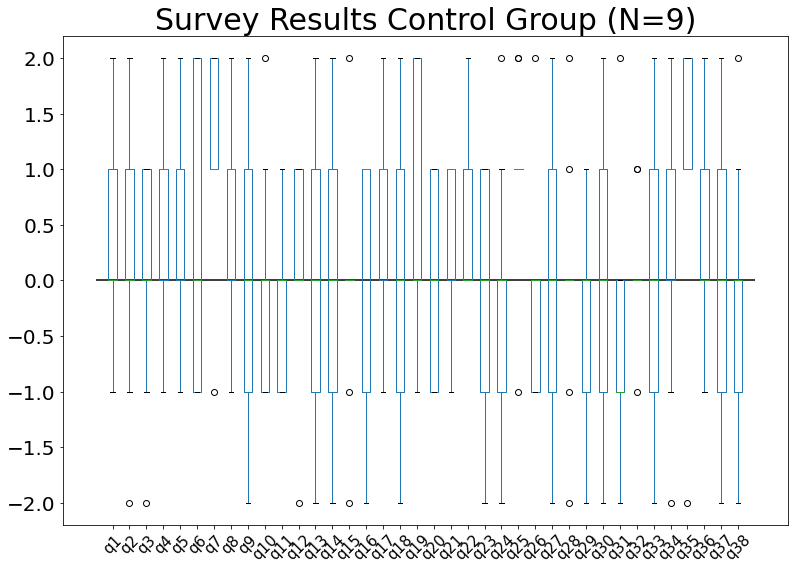

In [7]:
control.plot(kind='box')
fig = plt.gcf()
fig.set_size_inches(13,9)
plt.xticks(fontsize=15, rotation=45);
plt.yticks(fontsize=20);
plt.hlines(0,0,39,color='black')
plt.title("Survey Results Control Group (N={})".format(len(control)), fontsize=30);
plt.savefig("Survey_Results_Control_Group_per_q.png")

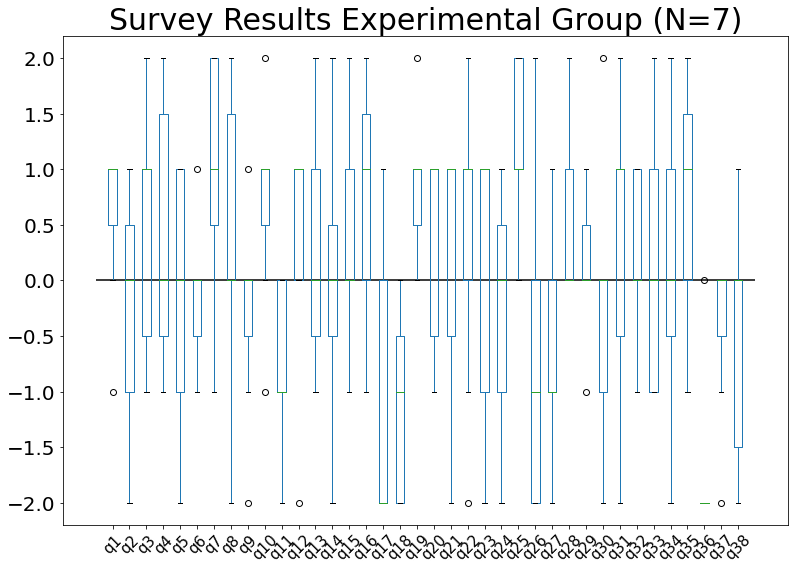

In [8]:
experimental.plot(kind='box')
fig = plt.gcf()
fig.set_size_inches(13, 9)
plt.xticks(fontsize=15, rotation=45);
plt.yticks(fontsize=20);
plt.hlines(0,0,39,color='black')
plt.title("Survey Results Experimental Group (N={})".format(len(experimental)), fontsize=30);
plt.savefig("Survey_Results_Experimental_Group_per_q.png")

In [9]:
experimental['switched'] = 'wrong code entered'

for ids in experimental.index:
    if ids in switched_ids:
        experimental['switched'].loc[ids] = "switched"
    if ids not in switched_ids:
        experimental['switched'].loc[ids] = "not_switched"
    print("{} in switched ids: {}".format(ids, (ids in switched_ids)))
    
experimental

4fe7685f-6e91-4cca-aacc-0908dd55478a in switched ids: True
9bc79772-d9ad-4e3d-bc83-c014cde2d0f5 in switched ids: True
efa19ad3-a861-4459-bb6d-af407631347a in switched ids: True
9d4b6298-ce58-4e49-a5da-e31f3a1080b8 in switched ids: True
8e44e979-f96d-4cd1-8569-eb8807ae8f58 in switched ids: False
f45e21d3-63c2-437d-a553-8f13946192dc in switched ids: False
7afd100a-5866-4293-89cb-d62d482a31fa in switched ids: True


C:\Users\s155633\.conda\envs\Thesis\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q31,q32,q33,q34,q35,q36,q37,q38,group,switched
Wat is de code die in de e-mail is meegestuurd?,,,,,,,,,,,,,,,,,,,,,
4fe7685f-6e91-4cca-aacc-0908dd55478a,1,-2,-1,0,1,0,2,1,0,2,...,0,0,-1,-1,2,-2,0,-2,experimental,switched
9bc79772-d9ad-4e3d-bc83-c014cde2d0f5,1,-1,2,2,1,0,2,2,0,1,...,2,1,2,-2,2,-2,0,1,experimental,switched
efa19ad3-a861-4459-bb6d-af407631347a,1,1,-1,2,-2,-1,2,0,-2,1,...,-2,-1,-1,1,1,-2,-2,-2,experimental,switched
9d4b6298-ce58-4e49-a5da-e31f3a1080b8,1,0,1,0,-1,0,0,-2,0,1,...,1,1,0,1,-1,0,0,0,experimental,switched
8e44e979-f96d-4cd1-8569-eb8807ae8f58,-1,-1,1,-1,-1,0,-1,2,-1,-1,...,-1,1,-1,0,-1,-2,-1,-1,experimental,not_switched
f45e21d3-63c2-437d-a553-8f13946192dc,1,1,0,1,1,1,1,0,1,1,...,1,0,1,2,1,-2,0,0,experimental,not_switched
7afd100a-5866-4293-89cb-d62d482a31fa,0,0,1,-1,0,-1,1,0,0,0,...,1,0,1,0,1,-2,0,0,experimental,switched


In [10]:
total = pd.concat([control,experimental])
NS = total[total['switched']=='not_switched']
S = total[total['switched']=='switched']

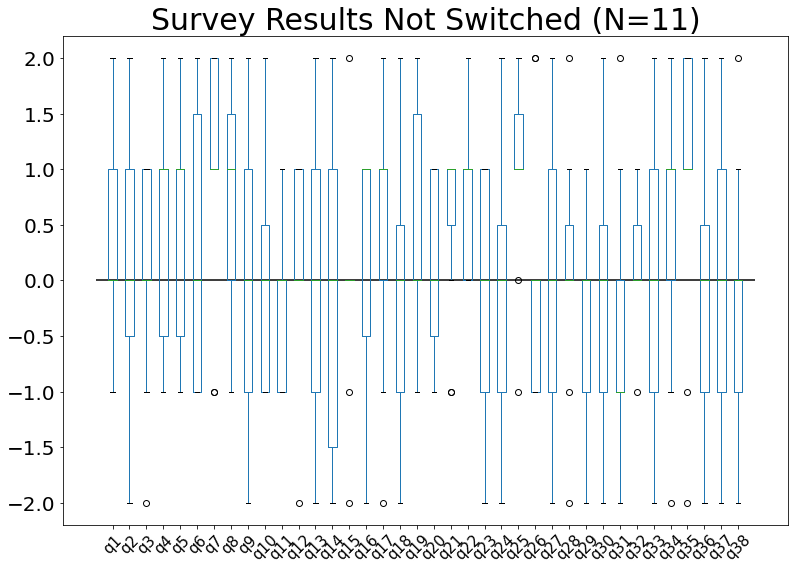

In [11]:
NS.plot(kind='box')
fig = plt.gcf()
fig.set_size_inches(13, 9)
plt.xticks(fontsize=15, rotation=45);
plt.yticks(fontsize=20);
plt.hlines(0,0,39,color='black')
plt.title("Survey Results Not Switched (N={})".format(len(NS)), fontsize=30);
plt.savefig("Survey_Results_Not_Switched_per_q.png")

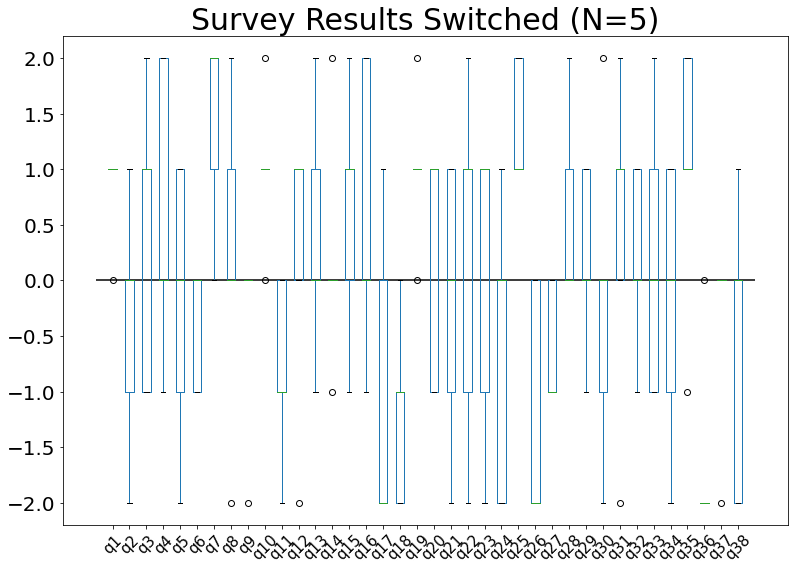

In [12]:
S.plot(kind='box')
fig = plt.gcf()
fig.set_size_inches(13, 9)
plt.xticks(fontsize=15, rotation=45);
plt.yticks(fontsize=20);
plt.hlines(0,0,39,color='black')
plt.title("Survey Results Switched (N={})".format(len(S)), fontsize=30);
plt.savefig("Survey_Results_Switched_per_q.png")

## Make a comparison between the experimental conditions

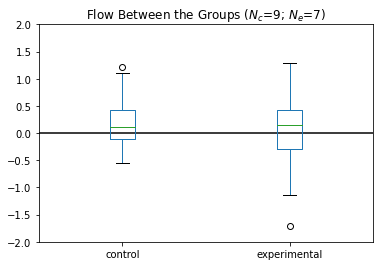

In [13]:
total = pd.concat([control,experimental])
mean_per_q = total.groupby('group').mean()
mean_per_q

# Between Control and Experimental
mean_per_q.transpose().boxplot()
plt.gcf()
plt.grid()
plt.ylim(-2,2)
plt.hlines(0,0.5,2.5,color='black')
plt.title("Flow Between the Groups ($N_c$={}; $N_e$={})".format(total['group'].value_counts()['control'],
                                                               total['group'].value_counts()['experimental']))
plt.savefig("Total_Control_Experimental_Flow.png")

In [14]:
total

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q31,q32,q33,q34,q35,q36,q37,q38,group,switched
Wat is de code die in de e-mail is meegestuurd?,,,,,,,,,,,,,,,,,,,,,
91bc991d-b8cc-4c8c-aa79-b8363ae3ecd2,1,2,1,1,1,2,2,1,1,1,...,-2,1,1,1,2,0,1,2,control,not_switched
95b9023f-d06c-4c02-83ee-a738a7b9a2c3,1,1,1,1,1,1,1,1,0,0,...,-1,0,1,1,1,0,1,0,control,not_switched
ce49b981-8468-4e70-a005-23b6ace3bc72,0,0,-1,0,-1,-1,1,0,-2,0,...,0,0,-1,-1,1,-1,-1,-1,control,not_switched
f7362ad4-7a51-4e76-9624-60b019664561,2,1,1,2,0,2,2,2,2,2,...,2,1,2,2,2,0,2,1,control,not_switched
5e74b09e-87e9-472a-b885-c805e136dc84,0,0,0,0,-1,-1,2,0,-1,-1,...,-1,0,-2,1,2,1,-1,-1,control,not_switched
350ef1cd-fdf5-4a9e-822a-ae0ba38ffbb3,0,1,1,1,2,2,1,1,0,0,...,0,0,0,0,1,1,1,-1,control,not_switched
weet ik ni,0,-2,-2,-1,1,-1,2,2,-2,-1,...,-2,-1,-2,0,1,2,-2,-2,control,not_switched
6ff45359-2c36-4eef-8154-b6ac022da854,0,-1,0,1,1,0,-1,-1,1,-1,...,0,0,2,1,-2,-1,0,0,control,not_switched
d7439e6a-109d-4b43-9499-8d8dffaed87b,-1,0,0,-1,1,-1,1,1,-1,-1,...,-1,0,-1,-2,2,0,-2,0,control,not_switched


## Comparison between the switched and the not switched groups

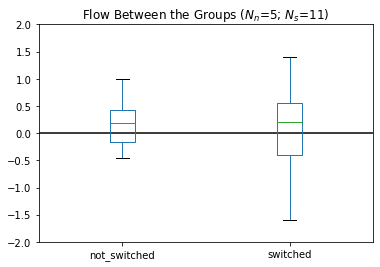

In [17]:
mean_per_q = total.groupby('switched').mean()
mean_per_q

# Between Switched and Not_Switched
mean_per_q.transpose().boxplot()
plt.gcf()
plt.grid()
plt.ylim(-2,2)
plt.hlines(0,0.5,2.5,color='black')
plt.title("Flow Between the Groups ($N_n$={}; $N_s$={})".format(total['switched'].value_counts()['switched'],
                                                               total['switched'].value_counts()['not_switched']))
plt.savefig("Total_Switched_not_Switched_Flow.png")



In [18]:
# Printing the descriptives of the survey
no_students = 148
print("Sent out to 1 school with {} students".format(no_students))
print("response rate of {}% because {} students replied".format(round(100*len(total)/no_students,2), len(total)))
print("{} were in the control group and {} in the experimental group".format(total['group'].value_counts()['control'],total['group'].value_counts()['experimental']))
print("{} did switch levels and {} did not switch levels".format(total['switched'].value_counts()['switched'],total['switched'].value_counts()['not_switched']))

Sent out to 1 school with 148 students
response rate of 10.81% because 16 students replied
9 were in the control group and 7 in the experimental group
5 did switch levels and 11 did not switch levels


In [19]:
# Saving the Dataframes to CSV so that they can be analysed with stata
total['flow'] = total.mean(axis=1)
total[['group','flow']].to_csv("avg_flow_group.csv")
total[['switched','flow']].to_csv("avg_flow_switched.csv")